In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from math import log2
%matplotlib inline

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
import time
import matplotlib as mpl


from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.feature_selection import VarianceThreshold, SelectKBest

import os,sys,inspect
#import functions

In [2]:
# Custom functions
import pathlib
import os
import sys

module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path
import functions

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/voting', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-python.python-2020.10.332292344/pythonFiles', '/home/alexander/.vscode/extensions/ms-python.python-2020.10.332292344/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/home/alexander/.local/lib/python3.7/site-packages/IPython/extensions', '/home/alexander/.ipython', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1']


In [3]:
datapath_train = get_data_path("Congressional_Voting", "CongressionalVotingID.shuf.train.csv")
display(datapath_train)
datapath_test = get_data_path("Congressional_Voting", "CongressionalVotingID.shuf.test.csv")
display(datapath_test)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/Datasets/Congressional_Voting/CongressionalVotingID.shuf.train.csv')

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/Datasets/Congressional_Voting/CongressionalVotingID.shuf.test.csv')

# Data exploration
Data consinst out of of class for the classification and the instances are mostly "y,n,unknown".

In [4]:
df_train = pd.read_csv(datapath_train).drop("ID",axis = 1)
df_test = pd.read_csv(datapath_test).drop("ID",axis = 1)

df_train = df_train.rename(columns={"class": "Class"})
df_train

,Class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,n,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,republican,n,n,n,y,y,n,n,n,n,n,n,y,y,y,n,y
2,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,unknown
3,democrat,y,n,y,n,n,n,unknown,y,y,unknown,n,n,n,n,y,unknown
4,democrat,y,n,y,n,n,n,y,y,y,n,y,n,n,n,y,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,democrat,y,y,y,n,y,y,n,y,n,n,y,n,y,n,y,y
214,republican,y,y,y,y,y,y,y,y,n,y,n,n,y,y,n,y
215,republican,n,n,n,y,y,y,n,n,n,n,n,y,y,y,n,n
216,republican,n,y,n,y,y,y,y,n,n,n,n,y,y,y,n,y


In [5]:
num_samples, num_features = df_train.shape
num_features -= 2 # class and id aren't features
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Class                                   218 non-null    object
 1   handicapped-infants                     218 non-null    object
 2   water-project-cost-sharing              218 non-null    object
 3   adoption-of-the-budget-resolution       218 non-null    object
 4   physician-fee-freeze                    218 non-null    object
 5   el-salvador-aid                         218 non-null    object
 6   religious-groups-in-schools             218 non-null    object
 7   anti-satellite-test-ban                 218 non-null    object
 8   aid-to-nicaraguan-contras               218 non-null    object
 9   mx-missile                              218 non-null    object
 10  immigration                             218 non-null    object
 11  synfue

In [6]:
# Count occurence of M/B
count_classes = df_train["Class"].value_counts()
count_classes

democrat      137
republican     81
Name: Class, dtype: int64

In [7]:
dist_classes = count_classes.apply(lambda x: x/num_samples)
dist_classes

democrat      0.62844
republican    0.37156
Name: Class, dtype: float64

## Features:

n... no

y... yes

unknown

We will later also use the mapping/encoding:

$unknown \rightarrow 0$

$n \rightarrow -1$

$y \rightarrow 1$

# Data preparation

In [8]:
df_train = df_train.replace("n",-1)
df_train = df_train.replace("y",1)
df_train = df_train.replace("unknown",0)


df_test = df_test.replace("n",-1)
df_test = df_test.replace("y",1)
df_test = df_test.replace("unknown",0)

In [9]:
# Colors
sns_cols = sns.color_palette()
snsblue, snsgreen = sns_cols[0], sns_cols[1]

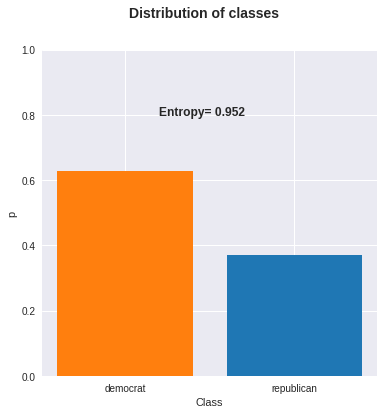

In [10]:
plt.rcParams.update({'font.size': 12})
mpl.style.use('seaborn')
fig = plt.figure(figsize=(6,6))
plt.bar(dist_classes.index, dist_classes, color=[snsgreen, snsblue])
plt.suptitle("Distribution of classes", fontsize=14, weight="bold")
plt.ylim((0,1))
plt.ylabel("p")
plt.xlabel("Class")

entropy = -sum([p*log2(p) for p in dist_classes])
plt.annotate(f"Entropy= {entropy:.3f}", (0.2, 0.8), fontweight="bold")

plt.savefig("class_dist.png")

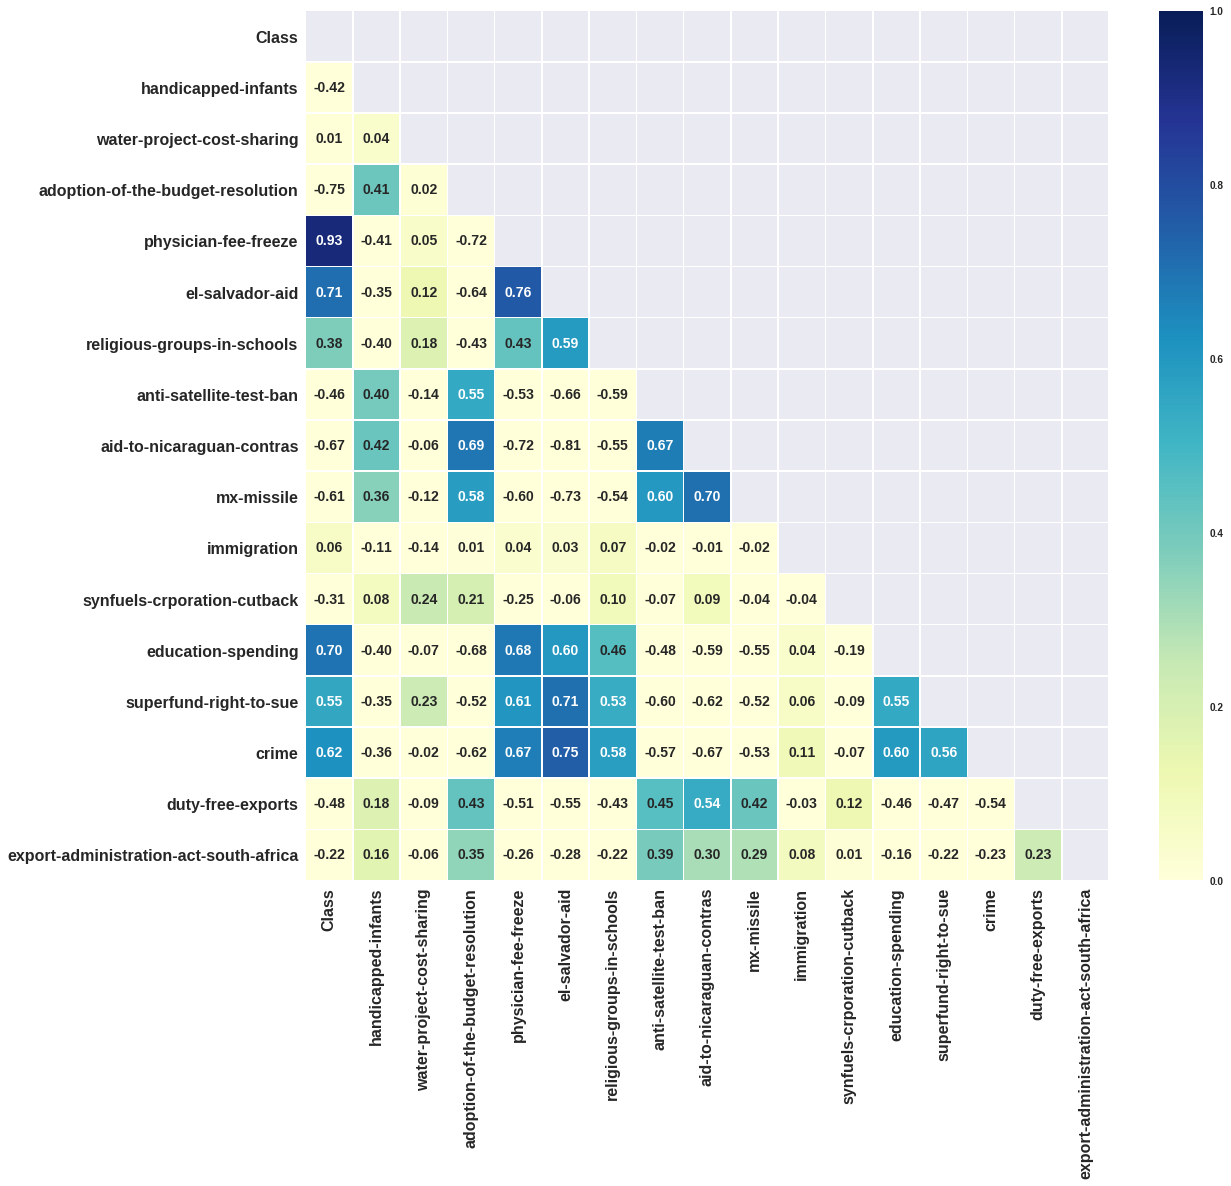

In [11]:
corr_to_class_stripped = functions.plot_corr_heatmap(df_train, ticksfont=16,abs = False)

In [ ]:
df_train[["el-salvador-aid","aid-to-nicaraguan-contras"]].all

In [ ]:
red_corr_list = functions.Red_corr_list(corr_to_class_stripped,0.4)
red_corr_list

In [ ]:
df_train_red = df_train.drop(red_corr_list,axis = 1)

In [ ]:
corr_to_class_stripped = functions.plot_corr_heatmap(df_train_red, ticksfont=16)

In [ ]:
df_train = df_train_red

In [ ]:
red_list = list(df_train_red)
red_list[-1]

In [ ]:
red_list = list(df_train_red)
X_lrn = df_train.loc[:,red_list[1]:red_list[-1]]
Y_lrn = df_train.loc[:,"Class":"Class"]
df_test = df_test.loc[:,red_list[1]:red_list[-1]]

In [ ]:
df_test

In [ ]:
df_train

In [ ]:
#X_lrn = KBest(X_lrn, Y_lrn)

In [ ]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_lrn, Y_lrn, test_size=0.4) #random noch einfügen

In [ ]:
#scaler = StandardScaler()  
#scaler.fit(X_train) 
#X_train = scaler.transform(X_train) 
#X_valid = scaler.transform(X_valid)  

# Training

# Grid-search

In [ ]:
alphas = [1e-3,1e-2,1e-1,1,10,100] 
activation = ["relu","identity","logistic","tanh"]
solver = ["sgd","adam"]
learning_rate = ["constant"]
h = [100,300,500]
maxiter = 1000
scaler = ["standart", "norm", "minmax", "quantile"]

In [ ]:
alphas = [1e-3] 
activation = ["relu","tanh"]
solver = ["adam"]
learning_rate = ["constant"]
h = [100]
maxiter = 1000
#scaler = ["standart", "norm", "minmax", "quantile"]
scaler = ["standart"]

In [ ]:
#clf = MLPClassifier(hidden_layer_sizes=(1000),alpha=1,activation="relu",solver="adam",max_iter=2000)

In [ ]:
#clf.fit(X_train, Y_train)
#Y_pred = clf.predict(X_valid)
#print(accuracy_score(Y_valid, Y_pred))

In [ ]:
Y_lrn = Y_lrn.drop([217])

In [ ]:
results = functions.MLP_Search(alphas,activation,solver,h,maxiter,X_train, X_valid, Y_train, Y_valid, scaler)
best_params_SC = functions.FindBestScore(results)

In [ ]:
results = functions.MLP_Search(alphas,activation,solver,h,maxiter,X_train, df_test, Y_train, Y_lrn, scaler)
best_params_SC = functions.FindBestScore(results)

# Important cell

In [ ]:
start = time.time()
X_train, df_test = functions.DefinScaler(best_params_SC["scaler"], X_train, df_test)
clf = MLPClassifier(hidden_layer_sizes=(best_params_SC["h"]),alpha=best_params_SC["alpha"],activation=best_params_SC["mode"],solver=best_params_SC["solver"],max_iter=2000)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(df_test)
ende = time.time()
print(accuracy_score(Y_lrn, Y_pred))
print('{:5.3f}s'.format(ende-start))

#functions.Statistic(Y_lrn,Y_pred,"MLP GB_SC")

In [ ]:
    print("Heat map: ")
    plt.figure()
    cm = confusion_matrix(Y_lrn.Class, Y_pred)
    sns.heatmap(cm, center=True)

    

In [ ]:
def Statistic(Y_valid,Y_pred,name):
    print("Heat map: ")
    plt.figure()
    cm = confusion_matrix(Y_valid.Class, Y_pred)
    sns.heatmap(cm, center=True)
    plt.savefig("Heatmap {}".format(name))
    plt.figure()
    sns.distplot(Y_valid.Class)
    sns.distplot(Y_pred, color="red")
    plt.savefig("difference between prediction and validation {}".format(name))

    plt.figure()
    sns.distplot(Y_valid.Class-Y_pred)
    plt.savefig("total difference between prediction and validation {}".format(name))
    print(sqrt(mean_squared_error(Y_valid.Class, Y_pred)))

    Y_pred_Norm = Y_pred / np.linalg.norm(Y_pred)
    Y_valid_Norm = Y_valid / np.linalg.norm(Y_valid.Class)

    print(sqrt(mean_squared_error(Y_pred_Norm, Y_valid_Norm)))

In [ ]:
functions.Statistic(Y_lrn,Y_pred,"MLP GB_SC")

In [ ]:
Y_lrn

# Validation

In [ ]:
df_test = df_test.replace("n",1)
df_test = df_test.replace("y",2)
df_test = df_test.replace("unknown",0)
df_test
#df_test = scaler.transform(df_test) 

In [ ]:
#X_train = scaler.transform(X_train) 
Y_pred = clf.predict(df_test)

In [ ]:
Y_lrn = Y_lrn.drop([217])
print(accuracy_score(Y_lrn, Y_pred))

# Filepreparation for the Kagglecompetition

In [ ]:
#Y_pred = Y_pred.drop("ID",axis = 1)
solution_data = list(zip(list(range(0,217)), Y_pred))

In [ ]:
solution_table = pd.DataFrame(solution_data, columns=['ID', 'Class'])
solution_table.head()

In [ ]:
solution_table.to_csv(f"results/voting/SC_MLP.csv", index=False)

In [ ]:
Y_lrn